In [1]:
import pandas as pd 
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [2]:
# Import CSV
app = pd.read_csv('application_record.csv')
credit = pd.read_csv('credit_record.csv')

In [3]:
# Application data exploration
app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
# Check for number of columns and rows
app.shape

(438557, 18)

In [5]:
# Check for data types
app.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

In [6]:
# Check for null values
app.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [7]:
# Since there are 134203 missing occupation values out of 438557 rows (30% of the data), it would be helpful to figure out which
# rows are missing those values. If they are all from the same ID, then I could reasonably just take them out. But since the 
# variable is occupation, I could possibly replace the values with "unknown" instead.

missing_occ = app[app.isnull().any(axis=1)]

In [8]:
missing_occ.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


In [9]:
missing_occ.shape

(134203, 18)

In [10]:
# Get the list of individual occupation names
app['OCCUPATION_TYPE'].unique().tolist()

[nan,
 'Security staff',
 'Sales staff',
 'Accountants',
 'Laborers',
 'Managers',
 'Drivers',
 'Core staff',
 'High skill tech staff',
 'Cleaning staff',
 'Private service staff',
 'Cooking staff',
 'Low-skill Laborers',
 'Medicine staff',
 'Secretaries',
 'Waiters/barmen staff',
 'HR staff',
 'Realty agents',
 'IT staff']

In [11]:
# Considering the vague nature of the occupations and the fact that knowing the name of the occupation likely doesn't add more
# information than knowing the annual income, it would probably be easier just to drop the occupation column.
app = app.drop(['OCCUPATION_TYPE'], axis=1)

In [12]:
# Everyone has a mobile phone, therefore there can't be a definitive effect from having a mobile phone on credit.
app['FLAG_MOBIL'].unique().tolist()

[1]

In [13]:
app = app.drop(['FLAG_MOBIL'], axis=1)

In [14]:
# Find how many ID numbers there are
len(app['ID'].unique())

438510

In [15]:
# There are duplicate ID numbers. I need to take a look at those rows more closely.
duplicateRowsDF = app[app.duplicated(['ID'], keep=False)]

In [16]:
duplicateRowsDF.sort_values(by=['ID'])

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
426818,7022197,M,Y,Y,3,135000.0,Working,Secondary / secondary special,Married,House / apartment,-11945,-735,0,0,1,5.0
425023,7022197,F,N,Y,0,450000.0,Commercial associate,Higher education,Separated,House / apartment,-19813,-1799,0,0,1,1.0
431545,7022327,F,N,Y,0,135000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-14771,-5298,0,0,0,1.0
431911,7022327,M,Y,Y,0,256500.0,Commercial associate,Higher education,Married,House / apartment,-21503,-1674,0,0,1,2.0
425486,7023108,M,Y,Y,1,67500.0,Working,Secondary / secondary special,Married,House / apartment,-15156,-1696,1,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426563,7836711,F,N,Y,2,292500.0,Working,Higher education,Married,House / apartment,-13747,-4386,0,1,0,4.0
421464,7836971,M,Y,N,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13771,-5520,0,0,0,3.0
428620,7836971,F,N,Y,0,103500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-13383,-2798,0,1,0,2.0
422068,7838075,M,N,Y,0,337500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18198,-1275,0,0,1,2.0


In [17]:
# Duplicate rows do seem to be entirely different from each other in most cases. I'll drop the first duplicate rows.
app = app.drop_duplicates('ID', keep='last')

In [18]:
app.shape

(438510, 16)

In [19]:
# I also want to drop any duplicate rows where the ID numbers are different but all the other variables are identical.
duplicatesMore = app[app.duplicated(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE',
                                     'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                                     'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS'], keep=False)]

In [20]:
duplicatesMore.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,1.0


In [21]:
duplicatesMore.shape

(423205, 16)

In [22]:
app = app.drop_duplicates(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE',
                           'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                           'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS'], keep='last')

In [23]:
app.shape

(90084, 16)

Dropping the duplicates severely decreases the number of rows. This may become an issue but there's still over 90000 rows available.

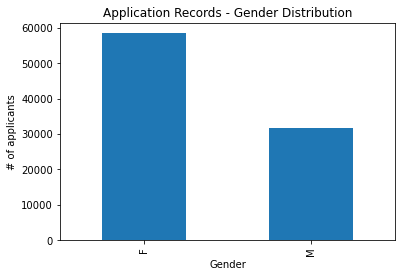

In [24]:
# I will look at data distributions for the different variables.
# Bar chart for gender data exploration
app['CODE_GENDER'].value_counts().plot(kind = 'bar')
plt.xlabel('Gender')
plt.ylabel('# of applicants')
plt.title('Application Records - Gender Distribution')
plt.show()

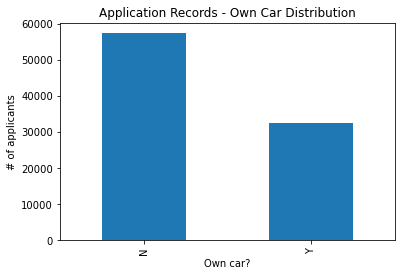

In [25]:
# Bar chart for car ownership data exploration
app['FLAG_OWN_CAR'].value_counts().plot(kind = 'bar')
plt.xlabel('Own car?')
plt.ylabel('# of applicants')
plt.title('Application Records - Own Car Distribution')
plt.show()

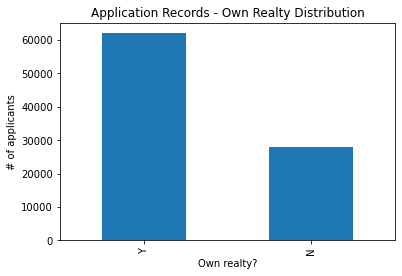

In [26]:
# Bar chart for realty ownership data exploration
app['FLAG_OWN_REALTY'].value_counts().plot(kind = 'bar')
plt.xlabel('Own realty?')
plt.ylabel('# of applicants')
plt.title('Application Records - Own Realty Distribution')
plt.show()

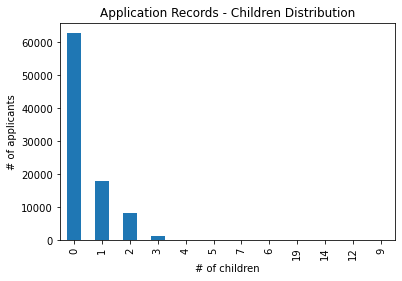

In [27]:
# Bar chart for children data exploration
app['CNT_CHILDREN'].value_counts().plot(kind = 'bar')
plt.xlabel('# of children')
plt.ylabel('# of applicants')
plt.title('Application Records - Children Distribution')
plt.show()

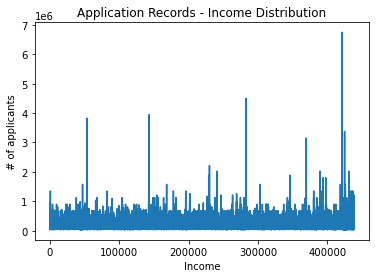

In [28]:
# Line chart for income data exploration
app['AMT_INCOME_TOTAL'].plot(kind = 'line')
plt.xlabel('Income')
plt.ylabel('# of applicants')
plt.title('Application Records - Income Distribution')
plt.show()

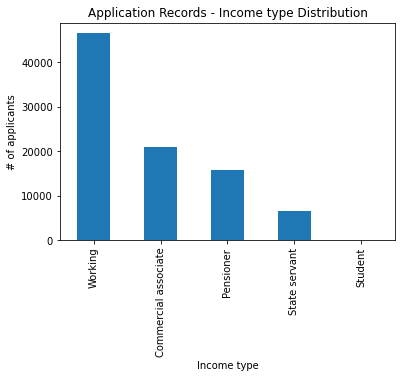

In [29]:
# Bar chart for income type data exploration
app['NAME_INCOME_TYPE'].value_counts().plot(kind = 'bar')
plt.xlabel('Income type')
plt.ylabel('# of applicants')
plt.title('Application Records - Income type Distribution')
plt.show()

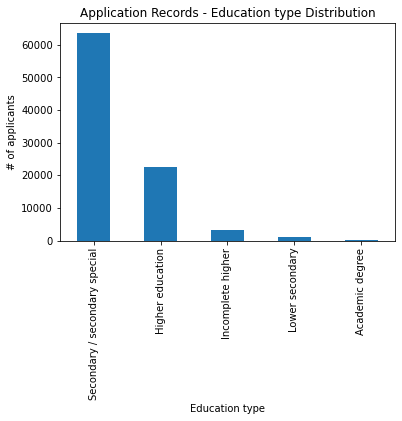

In [30]:
# Bar chart for education type data exploration
app['NAME_EDUCATION_TYPE'].value_counts().plot(kind = 'bar')
plt.xlabel('Education type')
plt.ylabel('# of applicants')
plt.title('Application Records - Education type Distribution')
plt.show()

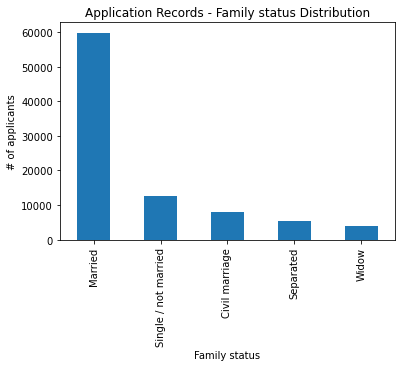

In [31]:
# Bar chart for Family status data exploration
app['NAME_FAMILY_STATUS'].value_counts().plot(kind = 'bar')
plt.xlabel('Family status')
plt.ylabel('# of applicants')
plt.title('Application Records - Family status Distribution')
plt.show()

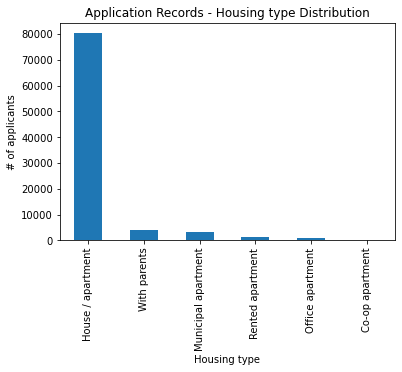

In [32]:
# Bar chart for housing type data exploration
app['NAME_HOUSING_TYPE'].value_counts().plot(kind = 'bar')
plt.xlabel('Housing type')
plt.ylabel('# of applicants')
plt.title('Application Records - Housing type Distribution')
plt.show()

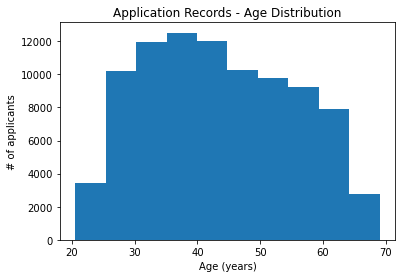

In [33]:
# Line chart for age data exploration
app['DAYS_BIRTH'].div(-365).plot(kind = 'hist')
plt.xlabel('Age (years)')
plt.ylabel('# of applicants')
plt.title('Application Records - Age Distribution')
plt.show()

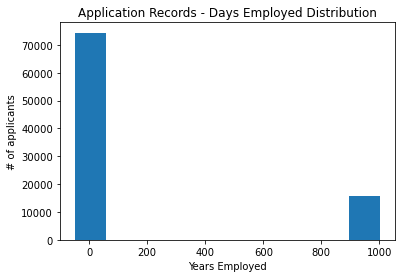

In [34]:
# Line chart for days employed data exploration
app['DAYS_EMPLOYED'].div(365).plot(kind = 'hist')
plt.xlabel('Years Employed')
plt.ylabel('# of applicants')
plt.title('Application Records - Days Employed Distribution')
plt.show()

In [35]:
# The number '364243' is being used to indicate an unemployment status. I'm going to change it to 0 to get a better idea of the
# overall employment stati.
app['DAYS_EMPLOYED'] = app['DAYS_EMPLOYED'].replace(365243, 0)

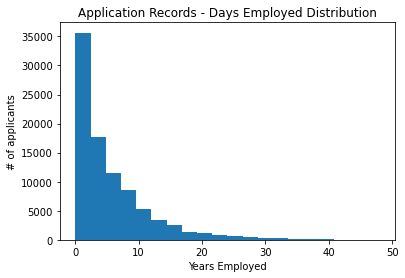

In [36]:
# Line chart for days employed data exploration
app['DAYS_EMPLOYED'].div(-365).plot.hist(bins = 20)
plt.xlabel('Years Employed')
plt.ylabel('# of applicants')
plt.title('Application Records - Days Employed Distribution')
plt.show()

In [37]:
# Credit data exploration
credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [38]:
# Number of rows and columns
credit.shape

(1048575, 3)

In [39]:
# Datatypes
credit.dtypes

ID                 int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object

In [40]:
# Finding null values
credit.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [41]:
# Drop duplicates
credit = credit.drop_duplicates(keep='last')

In [42]:
# No duplicate rows
credit.shape

(1048575, 3)

In [43]:
# There aren't as many unique IDs in the credit report file as in the application file.
len(credit['ID'].unique().tolist())

45985

In [44]:
# Create list to reduce app dataset to only the ID numbers represented in both sets.
shared_id = credit['ID'].unique().tolist()

In [45]:
len(shared_id)

45985

In [46]:
new_df = app[app.ID.isin(shared_id)]

In [47]:
new_df.shape

(5426, 16)

In [48]:
len(new_df['ID'].unique())

5426

After dropping the many duplicate rows, I'm left with 5426 unique IDs that are represented in both datasets.

In [49]:
credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


The number in the MONTHS_BALANCE column indicates the month prior to the date of data collection. It's a confusing metric and for this purpose I will focus on how many months a person was in a certain status. Each row indicates one month. Therefore, I'm going to ignore the MONTHS_BALANCE column and sum the number of each status for each person.

In [50]:
# Count the number of occurrences of each repayment status
count_status = pd.DataFrame(credit.groupby(['ID', 'STATUS'], as_index=False).size())

In [51]:
count_status.head()

,ID,STATUS,size
0,5001711,0,3
1,5001711,X,1
2,5001712,0,10
3,5001712,C,9
4,5001713,X,22


The pivot summarizes the number of months where each individual was in a specific status. 

0: 1-29 days past due 

1: 30-59 days past due 

2: 60-89 days overdue 

3: 90-119 days overdue 

4: 120-149 days overdue 

5: Overdue or bad debts, write-offs for more than 150 days 

C: paid off that month 

X: No loan for the month

Based off of these criteria, we can assign a score indicating high-risk or low-risk.

In [52]:
# Rename column
count_status = count_status.rename(columns ={'size':'MONTHS'})

In [53]:
# Create new dataframe of pivoted counts by ID
credit_final = pd.DataFrame(count_status.pivot_table(index='ID', columns = 'STATUS')).reset_index()

In [54]:
credit_final.head()

ID MONTHS                               
STATUS               0   1   2   3   4   5    C     X
0       5001711    3.0 NaN NaN NaN NaN NaN  NaN   1.0
1       5001712   10.0 NaN NaN NaN NaN NaN  9.0   NaN
2       5001713    NaN NaN NaN NaN NaN NaN  NaN  22.0
3       5001714    NaN NaN NaN NaN NaN NaN  NaN  15.0
4       5001715    NaN NaN NaN NaN NaN NaN  NaN  60.0

In [55]:
# Flatten column headers
credit_final.columns = credit_final.columns.to_series().str.join('_')

In [56]:
for col in credit_final.columns:
    print(col)

ID_
MONTHS_0
MONTHS_1
MONTHS_2
MONTHS_3
MONTHS_4
MONTHS_5
MONTHS_C
MONTHS_X


In [57]:
# Rename columns
credit_final = credit_final.rename(columns = {'ID_':'ID'})

In [58]:
credit_final.head()

,ID,MONTHS_0,MONTHS_1,MONTHS_2,MONTHS_3,MONTHS_4,MONTHS_5,MONTHS_C,MONTHS_X
0,5001711,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,5001712,10.0,NaN,NaN,NaN,NaN,NaN,9.0,NaN
2,5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0
3,5001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0
4,5001715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0


In [59]:
credit_final.shape

(45985, 9)

In [60]:
# Check for null values
credit_final.isnull().sum()

ID              0
MONTHS_0     6005
MONTHS_1    40784
MONTHS_2    45388
MONTHS_3    45717
MONTHS_4    45795
MONTHS_5    45790
MONTHS_C    23278
MONTHS_X    20980
dtype: int64

Now I have a count of the months that each person was in a specific status. An additional column of total months will be added to see how long the customer has been with the company.

In [61]:
# Add column for total months with the company
all_columns = ['MONTHS_0', 'MONTHS_1', 'MONTHS_2', 'MONTHS_3', 'MONTHS_4', 'MONTHS_5', 'MONTHS_C', 'MONTHS_X']
credit_final['MONTHS_TOT'] = credit_final[all_columns].sum(axis=1)

In [62]:
credit_final.head()

,ID,MONTHS_0,MONTHS_1,MONTHS_2,MONTHS_3,MONTHS_4,MONTHS_5,MONTHS_C,MONTHS_X,MONTHS_TOT
0,5001711,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0
1,5001712,10.0,NaN,NaN,NaN,NaN,NaN,9.0,NaN,19.0
2,5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,22.0
3,5001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,15.0
4,5001715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,60.0


Now I can merge the two datasets together.

In [63]:
# Merge credit_final IDs to app IDs, leaving only the 5426 unique common IDs.
master = app.merge(credit_final.set_index('ID'), on='ID')

In [64]:
master.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,CNT_FAM_MEMBERS,MONTHS_0,MONTHS_1,MONTHS_2,MONTHS_3,MONTHS_4,MONTHS_5,MONTHS_C,MONTHS_X,MONTHS_TOT
0,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,2.0,1.0,1.0,NaN,NaN,NaN,NaN,12.0,1.0,15.0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,2.0,7.0,NaN,NaN,NaN,NaN,NaN,7.0,16.0,30.0
2,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1.0,6.0,NaN,NaN,NaN,NaN,NaN,27.0,6.0,39.0
3,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,...,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,17.0
4,5008824,M,Y,Y,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0


In [65]:
master.shape

(5426, 25)

#### Feature creation

I need to create a target variable which is an indicator if someone is high-risk or low-risk for credit default.

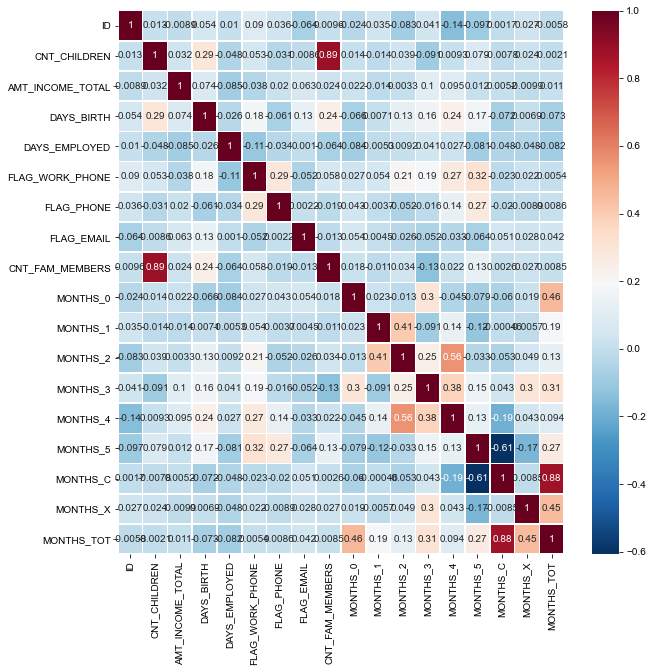

In [66]:
# Pearson correlations.
pearsoncorr = master.corr(method='pearson')

fig, ax = plt.subplots(figsize=(10,10))         
sb.heatmap(pearsoncorr, 
           xticklabels=pearsoncorr.columns,
           yticklabels=pearsoncorr.columns,
           cmap='RdBu_r',
           annot=True, linewidths= .5, ax=ax)
sb.set()

The Pearson correlation doesn't show me any clear correlations between the variables from the application data and the variables from the credit history data.

I will create a function to look for known high-risk factors (low income, lack of employment, history of not paying credit bill) and create a new column assigning a new variable for high-risk and low-risk, where high-risk = 1 and low-risk = 0. I will use the lower 25% quartile for income, 0 for employment, and the upper 25% quartile for months_5 (which is overdue or bad debts).

In [67]:
master.describe().loc[['min','max']]

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_0,MONTHS_1,MONTHS_2,MONTHS_3,MONTHS_4,MONTHS_5,MONTHS_C,MONTHS_X,MONTHS_TOT
min,5008805.0,0.0,27000.0,-25152.0,-15661.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,5150485.0,19.0,1575000.0,-7489.0,0.0,1.0,1.0,1.0,20.0,57.0,22.0,8.0,4.0,7.0,44.0,57.0,58.0,61.0


In [68]:
master.quantile([0.25,0.5,0.75])

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_0,MONTHS_1,MONTHS_2,MONTHS_3,MONTHS_4,MONTHS_5,MONTHS_C,MONTHS_X,MONTHS_TOT
0.25,5045788.50,0.0,112500.0,-19437.25,-2728.0,0.0,0.0,0.0,2.0,4.0,1.0,1.0,1.0,1.0,2.0,7.0,1.0,8.0
0.50,5085744.00,0.0,157500.0,-15328.00,-1242.5,0.0,0.0,0.0,2.0,7.0,2.0,1.0,1.0,1.0,5.0,14.0,2.0,15.0
0.75,5116755.25,1.0,225000.0,-12118.50,-305.0,0.0,1.0,0.0,3.0,11.0,3.0,2.0,1.0,1.0,9.0,26.0,7.0,28.0


In [69]:
def risk(row):
    if row['AMT_INCOME_TOTAL'] < 112500:
        val = 1
    elif row['MONTHS_5'] >= 9:
        val = 1
    elif (row['DAYS_EMPLOYED'] == 0) and (row['NAME_INCOME_TYPE'] != 'Pensioner'):
        val = 1
    elif (row['MONTHS_C'] == 0) and (row['MONTHS_X'] == 0):
        val = 1
    elif row['MONTHS_C'] == row['MONTHS_TOT']:
        val = 0
    elif row['MONTHS_X'] == row['MONTHS_TOT']:
        val = 0
    else:
        val = 0
    return val

In [70]:
master['RISK'] = master.apply(risk, axis=1)

In [71]:
master.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,MONTHS_0,MONTHS_1,MONTHS_2,MONTHS_3,MONTHS_4,MONTHS_5,MONTHS_C,MONTHS_X,MONTHS_TOT,RISK
0,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1.0,1.0,NaN,NaN,NaN,NaN,12.0,1.0,15.0,0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,7.0,NaN,NaN,NaN,NaN,NaN,7.0,16.0,30.0,0
2,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,6.0,NaN,NaN,NaN,NaN,NaN,27.0,6.0,39.0,0
3,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,...,14.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,17.0,0
4,5008824,M,Y,Y,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0


In [72]:
# The months are missing values but that is because those values are equal to 0. (0 months at that status) I need to replace
# the missing values with 0 for the model.
master.isnull().any()

ID                     False
CODE_GENDER            False
FLAG_OWN_CAR           False
FLAG_OWN_REALTY        False
CNT_CHILDREN           False
AMT_INCOME_TOTAL       False
NAME_INCOME_TYPE       False
NAME_EDUCATION_TYPE    False
NAME_FAMILY_STATUS     False
NAME_HOUSING_TYPE      False
DAYS_BIRTH             False
DAYS_EMPLOYED          False
FLAG_WORK_PHONE        False
FLAG_PHONE             False
FLAG_EMAIL             False
CNT_FAM_MEMBERS        False
MONTHS_0                True
MONTHS_1                True
MONTHS_2                True
MONTHS_3                True
MONTHS_4                True
MONTHS_5                True
MONTHS_C                True
MONTHS_X                True
MONTHS_TOT             False
RISK                   False
dtype: bool

In [73]:
master = master.fillna(0)

In [74]:
master.isnull().any()

ID                     False
CODE_GENDER            False
FLAG_OWN_CAR           False
FLAG_OWN_REALTY        False
CNT_CHILDREN           False
AMT_INCOME_TOTAL       False
NAME_INCOME_TYPE       False
NAME_EDUCATION_TYPE    False
NAME_FAMILY_STATUS     False
NAME_HOUSING_TYPE      False
DAYS_BIRTH             False
DAYS_EMPLOYED          False
FLAG_WORK_PHONE        False
FLAG_PHONE             False
FLAG_EMAIL             False
CNT_FAM_MEMBERS        False
MONTHS_0               False
MONTHS_1               False
MONTHS_2               False
MONTHS_3               False
MONTHS_4               False
MONTHS_5               False
MONTHS_C               False
MONTHS_X               False
MONTHS_TOT             False
RISK                   False
dtype: bool

In [75]:
# Save master dataframe to CSV
master.to_csv(r'credit_master.csv', index=False)